### In this project we will predict whether a person will payback their loan based on a set of features

In [30]:
# Import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [31]:
# Import training and testing data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [32]:
# View head of training data
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [33]:
train_df[:-1].describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593993.00000,593993.000000,593993.000000,593993.000000,593993.000000,593993.000000,593993.000000
mean,296996.00000,48212.201718,0.120696,680.915890,15020.309939,12.356349,0.798819
std,171471.15356,26711.964546,0.068573,55.424926,6926.529900,2.008959,0.400883
min,0.00000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.00000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.00000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.00000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593992.00000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [35]:
# Check to see if debt_to_income_ratio was the same as loan_amount/annual_income - not exactly the same so don't change
train_df[(train_df["loan_amount"]/train_df["annual_income"]).round()!=train_df["debt_to_income_ratio"].round()]

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
9,9,17342.45,0.121,548,9653.48,16.04,Female,Married,Bachelor's,Self-employed,Vacation,F1,1.0
10,10,14248.90,0.087,662,20258.18,14.63,Female,Married,High School,Employed,Vacation,D5,1.0
17,17,35268.70,0.089,576,23642.37,12.60,Male,Married,Bachelor's,Unemployed,Debt consolidation,F5,0.0
18,18,26451.15,0.088,644,17999.60,13.34,Male,Single,Master's,Employed,Debt consolidation,D5,1.0
21,21,48817.07,0.140,682,27101.69,13.60,Female,Single,Bachelor's,Employed,Debt consolidation,C2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593982,593982,28794.12,0.146,641,20234.13,14.43,Female,Married,Master's,Employed,Car,D2,1.0
593986,593986,25015.35,0.074,633,15922.61,13.91,Male,Married,Bachelor's,Employed,Debt consolidation,D2,0.0
593987,593987,17662.68,0.074,679,19792.92,15.48,Female,Single,Other,Employed,Debt consolidation,C3,1.0
593988,593988,15602.22,0.056,622,25706.47,15.75,Female,Married,High School,Employed,Debt consolidation,D2,1.0


In [36]:
# View training data head
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


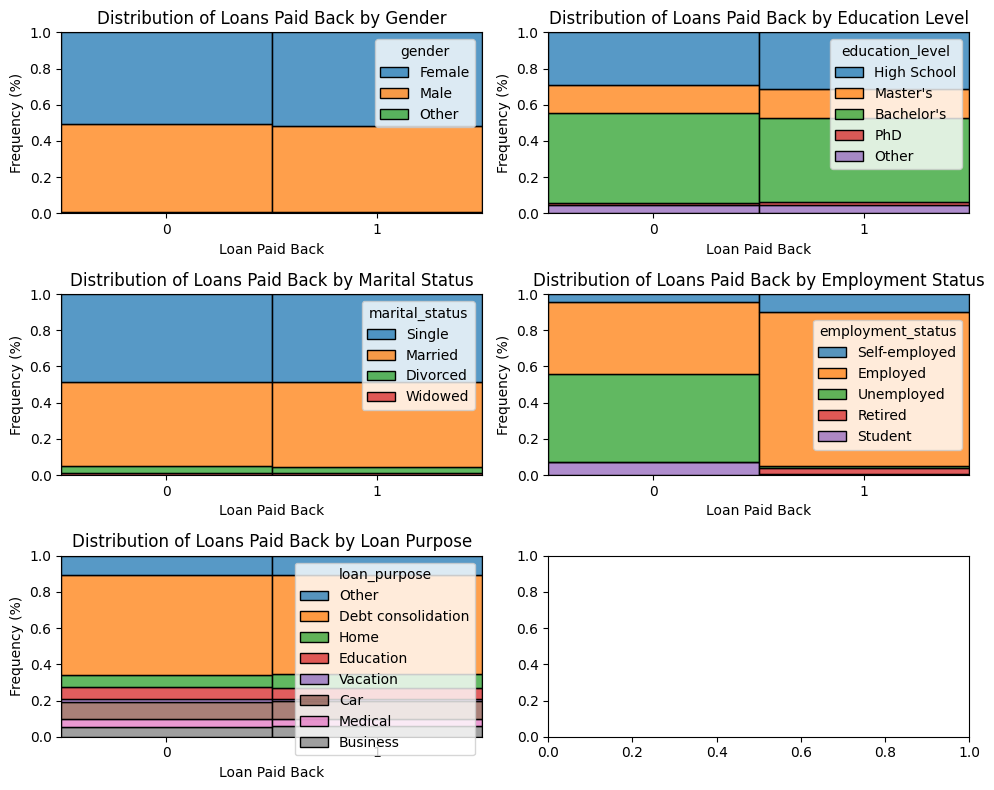

In [37]:
# Distribution plots of Loans Paid Back by each categorical variable
# Most distributions between Not Paid Back and Paid Back are same 
# Difference in Employment Status <- potentially very good predicting power
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

sns.histplot(data=train_df, x='loan_paid_back', hue='gender', multiple="fill", stat="percent", discrete=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Loans Paid Back by Gender')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xlabel('Loan Paid Back')
axes[0, 0].set_ylabel('Frequency (%)')

sns.histplot(data=train_df, x='loan_paid_back', hue='education_level', multiple="fill", stat="percent", discrete=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Loans Paid Back by Education Level')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xlabel('Loan Paid Back')
axes[0, 1].set_ylabel('Frequency (%)')

sns.histplot(data=train_df, x='loan_paid_back', hue='marital_status', multiple="fill", stat="percent", discrete=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Loans Paid Back by Marital Status')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xlabel('Loan Paid Back')
axes[1, 0].set_ylabel('Frequency (%)')

sns.histplot(data=train_df, x='loan_paid_back', hue='employment_status', multiple="fill", stat="percent", discrete=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Loans Paid Back by Employment Status')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xlabel('Loan Paid Back')
axes[1, 1].set_ylabel('Frequency (%)')

sns.histplot(data=train_df, x='loan_paid_back', hue='loan_purpose', multiple="fill", stat="percent", discrete=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Loans Paid Back by Loan Purpose')
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xlabel('Loan Paid Back')
axes[2, 0].set_ylabel('Frequency (%)')

plt.tight_layout()
plt.show()

In [38]:
# Preprocess the data

test_df.drop(['id'], axis=1, inplace=True)
X = train_df.drop(['loan_paid_back', 'id'], axis=1)
y = train_df['loan_paid_back']

numeric_feat = ["annual_income", "debt_to_income_ratio", "credit_score", "loan_amount", "interest_rate"]
cat_feat = ["gender", "marital_status",	"education_level",	"employment_status", "loan_purpose", "grade_subgrade"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_feat),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feat)
    ],
    remainder='passthrough')

# Build Full Pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),  
    ("classifier", GradientBoostingClassifier(n_estimators=200, random_state=42))])

In [39]:
# Train Model
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
# Get probabilities
y_probabilities = model.predict_proba(X_test)[:, 1]

# 5. Calculate the AUC score
auc_score = roc_auc_score(y_test, y_probabilities)

print(f"Model ROC AUC Score: {auc_score:.4f}")

Model ROC AUC Score: 0.9182


In [41]:
# Predict from test_df, save predictions with Id
final_probabilities = model.predict_proba(test_df)[:, 1]

submission = pd.DataFrame({
    "id": pd.read_csv("test.csv")["id"],
    "loan_paid_back": final_probabilities})

submission.to_csv("submission.csv", index=False)